In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [71]:
Travel_data = pd.read_csv('Miles_Traveled.csv')
# parse string to datetime
Travel_data['DATE'] = pd.to_datetime(Travel_data['DATE'])

In [72]:
Travel_data.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [73]:
Travel_data['Miles'] = Travel_data['TRFVOLUSM227NFWA']

In [74]:
Travel_data= Travel_data.drop(['TRFVOLUSM227NFWA'],axis=1)

In [75]:
Travel_data.head()

,DATE,Miles
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [76]:
Travel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    588 non-null    datetime64[ns]
 1   Miles   588 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.3 KB


In [77]:
Travel_data.set_index('DATE',inplace=True)
Travel_data.head()

,Miles
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


In [78]:
Travel_data.describe()

,Miles
count,588.000000
mean,190420.380952
std,57795.538934
min,77442.000000
25%,133579.000000
50%,196797.500000
75%,243211.500000
max,288145.000000


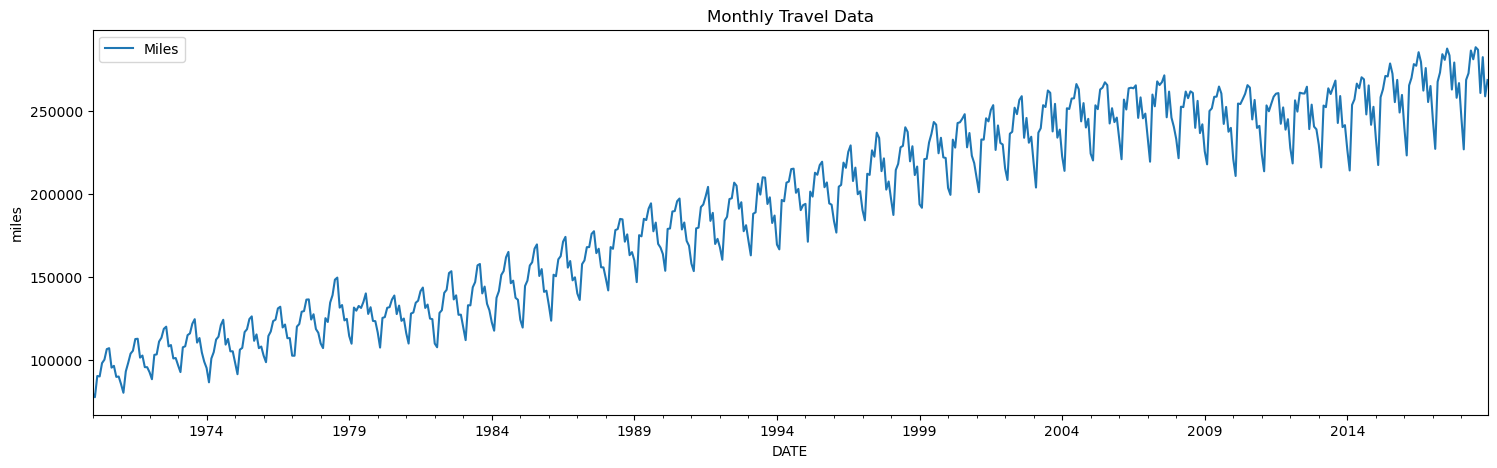

In [79]:
# Visualize the Data
# plot graph

Travel_data.plot(figsize=(18,5))
plt.title('Monthly Travel Data')
plt.xlabel('DATE')
plt.ylabel('miles')

plt.show()

In [80]:
# # determing rolling statistics
# rolmean = Travel_data.rolling(window=12).mean()

# rolstd = Travel_data.rolling(window=12).std()
# print(rolmean,rolstd)

In [81]:
# # plot rolling statistics:
# plt.figure(figsize=(15,6))
# orig = plt.plot(Travel_data,color='blue',label='Original')
# mean = plt.plot(rolmean,color='red',label='Rolling Mean')
# std = plt.plot(rolstd,color='green',label='Rolling Std')
# plt.legend(loc ='best')
# plt.title('Rolling Mean and Standerd deviation ')
# plt.show()

In [82]:
## perform Dickey-Fuller test

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(Travel_data['Miles'])

In [83]:
#Ho: it is non staionary
#H1: it is stationary
def adfull_test(Miles):
    result = adfuller(Miles)
    labels =['ADF Test Statistic','p-value','#lags Used','Number of observation Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print("stationary")
    else:
        print("non-Stationary")

In [84]:
adfull_test(Travel_data['Miles'])

ADF Test Statistic : -1.2425483519561487
p-value : 0.6550300653192418
#lags Used : 17
Number of observation Used : 570
non-Stationary


In [85]:
Travel_data['Miles First Difference'] = Travel_data['Miles'] - Travel_data['Miles'].shift(1)

In [86]:
Travel_data['Seasonal First Difference'] = Travel_data['Miles'] - Travel_data['Miles'].shift(12)

In [87]:
Travel_data.head(14)

,Miles,Miles First Difference,Seasonal First Difference
DATE,,,
1970-01-01,80173.0,NaN,NaN
1970-02-01,77442.0,-2731.0,NaN
1970-03-01,90223.0,12781.0,NaN
1970-04-01,89956.0,-267.0,NaN
1970-05-01,97972.0,8016.0,NaN
1970-06-01,100035.0,2063.0,NaN
1970-07-01,106392.0,6357.0,NaN
1970-08-01,106969.0,577.0,NaN
1970-09-01,95254.0,-11715.0,NaN


In [88]:
## again test dickey fuller test
adfull_test(Travel_data['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.6229046613789944
p-value : 0.005337939066000561
#lags Used : 15
Number of observation Used : 560
stationary


<Axes: xlabel='DATE'>

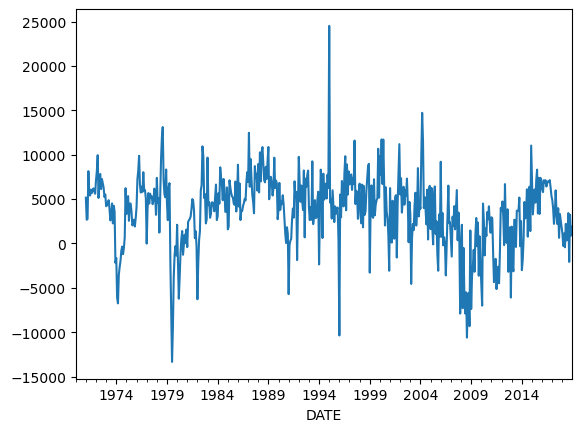

In [89]:
Travel_data['Seasonal First Difference'].plot()

In [90]:
# form non-seasional data
import statsmodels.api as sm

In [105]:
model = sm.tsa.statespace.SARIMAX(Travel_data['Miles'],order=(1,1,1),seasonal_order=(1,1,1,12))
result = model.fit()

In [106]:
#Travel_data.dropna(inplace=True)
Travel_data

,Miles,Miles First Difference,Seasonal First Difference,forecast
DATE,,,,
1970-01-01,80173.0,NaN,NaN,NaN
1970-02-01,77442.0,-2731.0,NaN,NaN
1970-03-01,90223.0,12781.0,NaN,NaN
1970-04-01,89956.0,-267.0,NaN,NaN
1970-05-01,97972.0,8016.0,NaN,NaN
...,...,...,...,...
2018-08-01,286608.0,-1537.0,3424.0,284643.032252
2018-09-01,260595.0,-26013.0,-2078.0,264878.712724
2018-10-01,282174.0,21579.0,3237.0,278920.833166


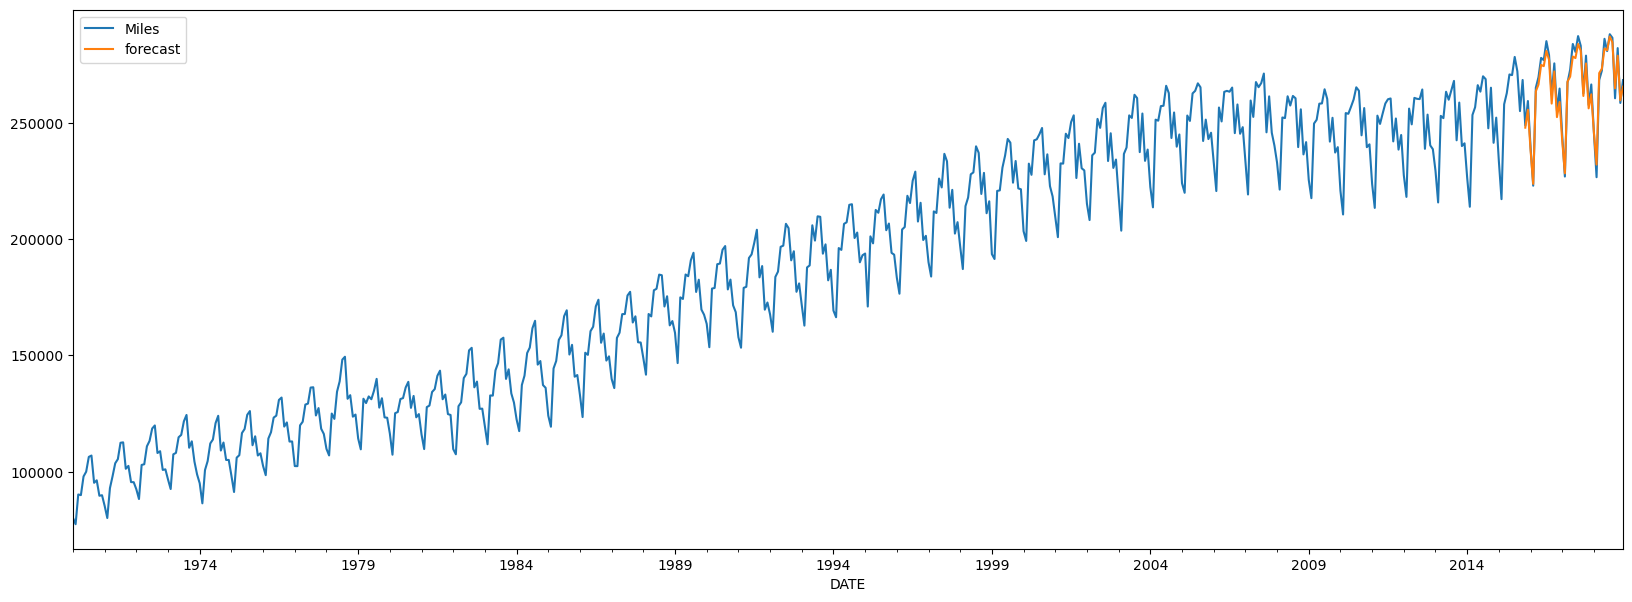

In [107]:
Travel_data['forecast'] =result.predict(start =550,end=588,dynamic=True)
Travel_data[['Miles','forecast']].plot(figsize=(20,7))
plt.show()

In [101]:
from pandas.tseries.offsets import DateOffset
future_dates = [Travel_data.index[-1]+ DateOffset(months=x) for x in range(0,36)]

In [102]:
future_dates_df = pd.DataFrame(index = future_dates[1:],columns=Travel_data.columns)

In [104]:
future_dates_df.tail()

,Miles,Miles First Difference,Seasonal First Difference,forecast
2019-01-01,NaN,NaN,NaN,NaN
2019-02-01,NaN,NaN,NaN,NaN
2019-03-01,NaN,NaN,NaN,NaN
2019-04-01,NaN,NaN,NaN,NaN
2019-05-01,NaN,NaN,NaN,NaN
2019-06-01,NaN,NaN,NaN,NaN
2019-07-01,NaN,NaN,NaN,NaN
2019-08-01,NaN,NaN,NaN,NaN
2019-09-01,NaN,NaN,NaN,NaN
2019-10-01,NaN,NaN,NaN,NaN


In [99]:
future_df = pd.concat([Travel_data,future_dates_df])

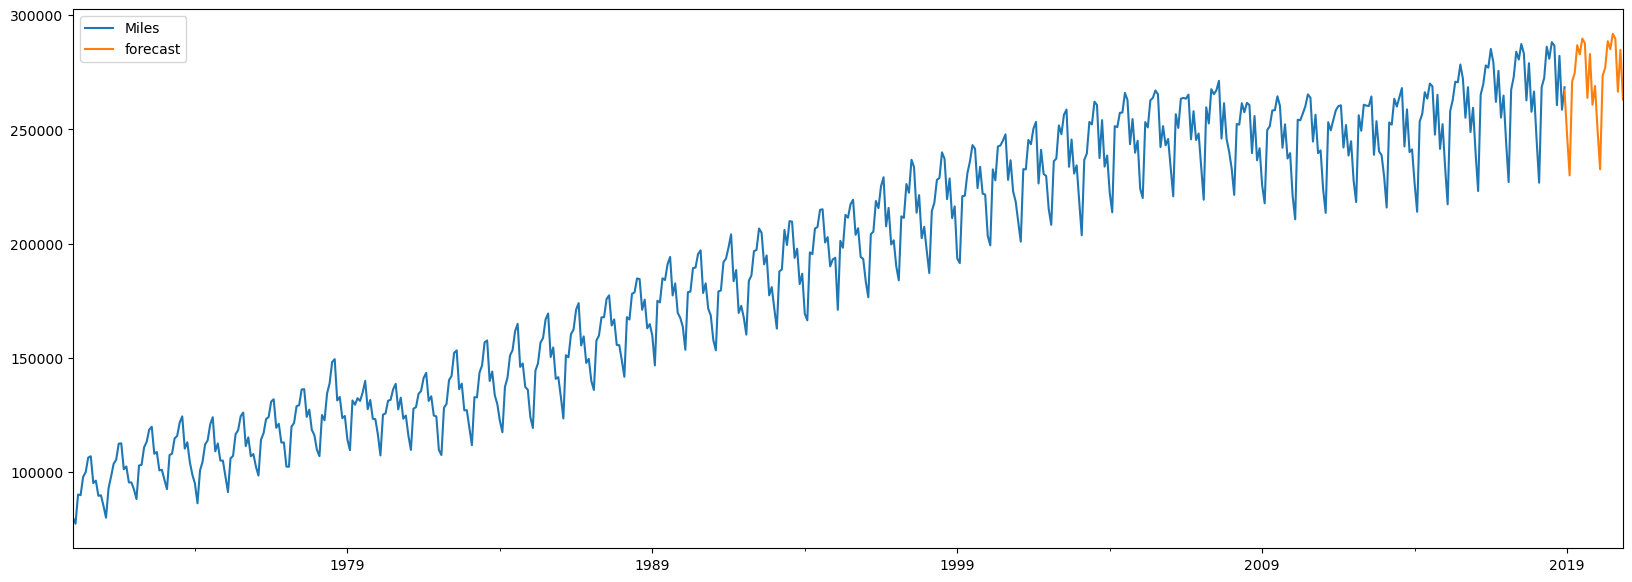

In [100]:
future_df['forecast'] = result.predict(start =587,end=1000,dynamic=True)
future_df[['Miles','forecast']].plot(figsize=(20,7))
plt.show()